In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from cv2 import imread

(620, 600, 3)


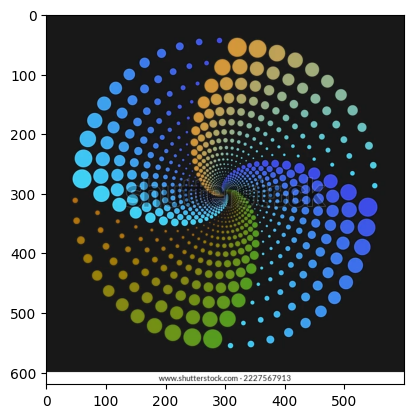

In [9]:
img = imread('/home/veeransh/Desktop/Self-Drive-Car-AI/Data/test/image_1.png')
print(img.shape)
plt.imshow(img)
plt.show()

# displaying the image 

In [10]:
def padding (x, filter_size, pad = 'SAME'):
    if pad == 'SAME':
        pad_h_min = int (np.floor((filter_size-1)/2))
        pad_h_max = int (np.ceil((filter_size-1)/2))
        # padding required on height 
        pad_w_min = int (np.floor((filter_size-1)/2))
        pad_w_max = int (np.ceil((filter_size-1)/2))
        # padding required on width
        pad_h, pad_w = (pad_h_min, pad_h_max), (pad_w_min, pad_w_max)
        return np.pad(x, (pad_h, pad_w, (0,0)), mode = 'constant')
    else:
        return x
# adds padding to 2D input array, so that conv ops can be applied without reducing dimensions of the image 
    
def get_shape (x, filter_size, stride):
    output_height = int ((x.shape[0]-filter_size)/ stride +1)
    output_width = int ((x.shape[1]-filter_size)/stride +1)
    return int (output_height), int (output_width)
# calculates shape of the output array after conv op is applied to input array 'x'

In [11]:
filter_size =5
kernel = np.ones((filter_size, filter_size), np.float32)/25
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

## Filter2D

In [13]:
def filter2d (x,w,out, filter_size, stride, function):
    for z in range (x.shape[2]):
        h_range = int ((x.shape[0]-filter_size)/ stride+1)
        for _h in range (h_range):
            w_range = int ((x.shape[1]-filter_size)/stride+1)
            for _w in range (w_range):
                out [_h, _w, z] = function (x[_h*stride:_h*stride+filter_size, _w*stride:_w*stride+filter_size, z]*w)
    return out 

# performs 2D conv ops (filter2d) on a 3D input array 'x' using filter 'w' and applies funcs to each filtered region, storing all the results in output array 'out'

In [15]:
x, y = get_shape (padding(img, filter_size), filter_size,1)
output_filter2d = np.zeros((x,y, img.shape[2]))
output_filter2d = filter2d(padding(img, filter_size), kernel, output_filter2d, filter_size,1,np.sum)

# pads the input image, calculates output shapes, applies 2D conv using a kernel, storing result in output_filter2d

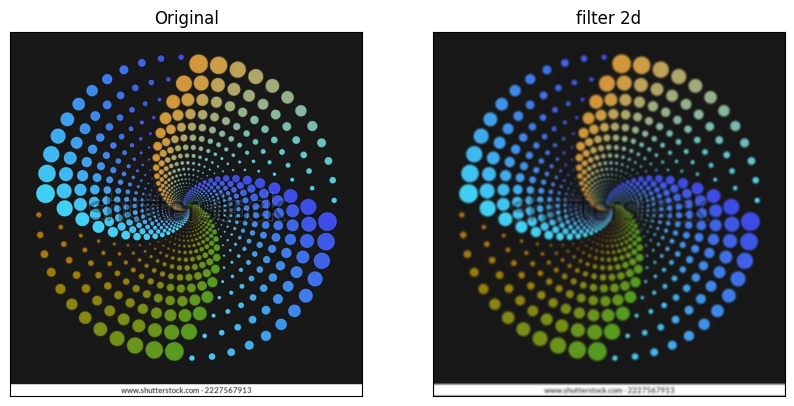

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_filter2d.astype(int)),plt.title('filter 2d')
plt.xticks([]), plt.yticks([])
plt.show()

# depiction of the conv ops applied - filter2d

## Smoothing

In [24]:
def smoothing(x, out, filter_size, stride, function):
    for z in range(x.shape[2]):
        h_range = int((x.shape[0] - filter_size) / stride + 1)
        for _h in range(h_range):
            w_range = int((x.shape[1] - filter_size) / stride + 1)
            for _w in range(w_range):
                out[_h, _w, z] = function(x[_h * stride:_h * stride + filter_size, _w * stride:_w * stride + filter_size, z])
    return out

In [25]:
y, x = get_shape(padding(img,filter_size),filter_size,1)
output_smoothing = np.zeros((y, x, img.shape[2]))
output_smoothing = smoothing(padding(img,filter_size),output_smoothing,filter_size,1,np.mean)

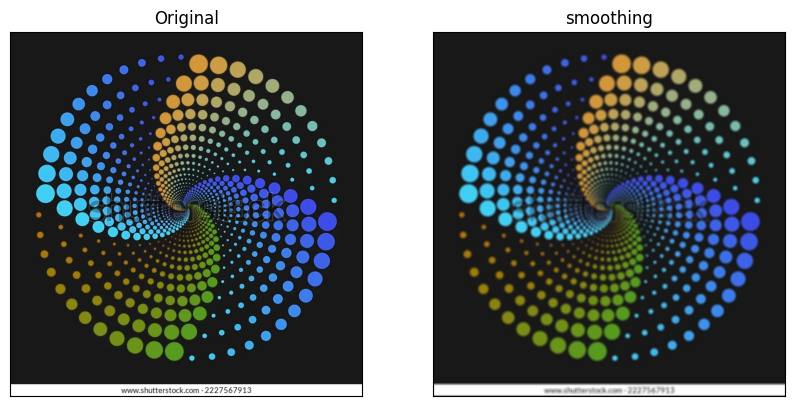

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_smoothing.astype(int)),plt.title('smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Filter

In [30]:
def gaussian_filter(shape =(5,5), sigma=1):
    x, y = [edge //2 for edge in shape]
    grid = np.array([[((i**2+j**2)/(2.0*sigma**2)) for i in range(-x, x+1)] for j in range(-y, y+1)])
    g_filter = np.exp(-grid)/(2*np.pi*sigma**2)
    g_filter /= np.sum(g_filter)
    return g_filter

In [31]:
kernel = gaussian_filter()
y, x = get_shape(padding(img,filter_size),filter_size,1)
output_filter2d = np.zeros((y, x, img.shape[2]))
output_filter2d = filter2d(padding(img,filter_size),kernel,output_filter2d,filter_size,1,np.sum)

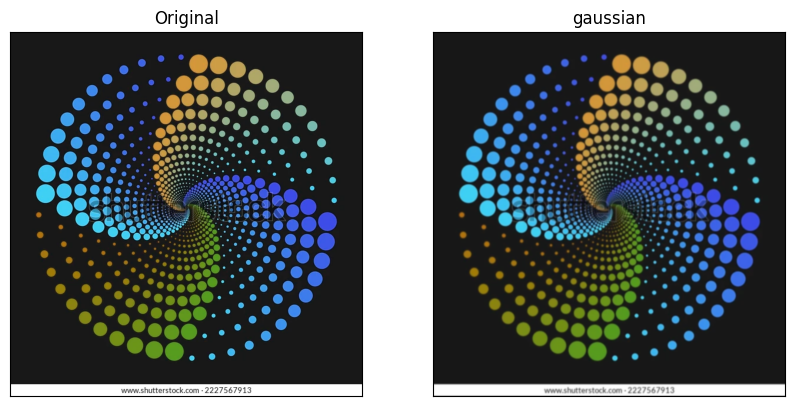

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_filter2d.astype(int)),plt.title('gaussian')
plt.xticks([]), plt.yticks([])
plt.show()

## Median Blurring 

In [33]:
noise_img = (img * np.random.rand(img.shape[0],img.shape[1],img.shape[2])).astype(int)
y, x = get_shape(padding(noise_img,filter_size),filter_size,1)
output_smoothing = np.zeros((y, x, img.shape[2]))
output_smoothing = smoothing(padding(noise_img,filter_size),output_smoothing,filter_size,1,np.median)


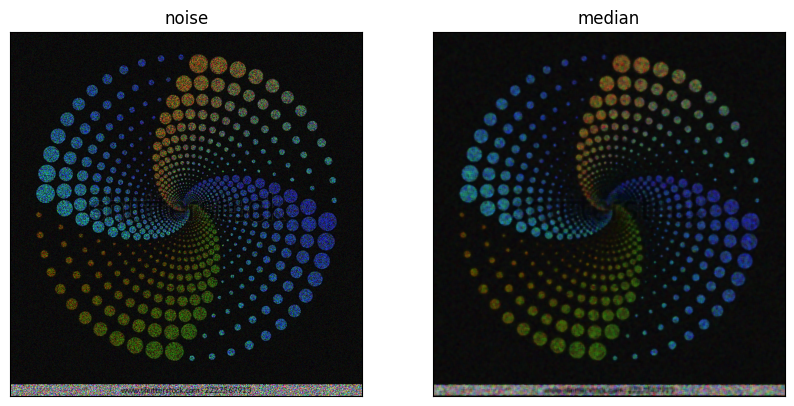

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(noise_img),plt.title('noise')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(output_smoothing.astype(int)),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()